In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Roc Curve and A uc Score

In [6]:
from sklearn.datasets import make_classification

In [14]:
from sklearn.model_selection import train_test_split

In [28]:
X,y = make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

In [30]:
X.shape

(2000, 20)

In [32]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [34]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("*"*60)
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863589331232614
************************************************************
Logistic test roc-auc: 0.9885777777777777


# KNN Classifie

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("*"*60)
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
************************************************************
Adaboost test roc-auc: 0.9426111111111111


In [70]:
# Random Forests

In [84]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("*"*60)
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
************************************************************
RF test roc-auc: 0.9826722222222223


In [73]:
ytrain_pred

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.  , 1.  ],
       ...,
       [0.97, 0.03],
       [0.99, 0.01],
       [0.22, 0.78]])

# Adaboost Classifier

In [82]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
print("*"*60)
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
************************************************************
Adaboost test roc-auc: 0.9826111111111111


# No we will focus on selecting the best threshold for maximum accuracy

In [80]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9850666666666668


In [93]:
pred

[0      0.98
 1      0.02
 2      0.99
 3      0.90
 4      0.56
        ... 
 595    0.01
 596    0.02
 597    0.97
 598    0.01
 599    1.00
 Length: 600, dtype: float64,
 0      0.991873
 1      0.000008
 2      0.966763
 3      0.761896
 4      0.779209
          ...   
 595    0.024263
 596    0.000003
 597    0.984400
 598    0.001157
 599    0.989543
 Length: 600, dtype: float64,
 0      0.559186
 1      0.463282
 2      0.538202
 3      0.509875
 4      0.490344
          ...   
 595    0.461121
 596    0.441377
 597    0.532403
 598    0.441720
 599    0.559890
 Length: 600, dtype: float64,
 0      1.0
 1      0.0
 2      0.8
 3      0.8
 4      0.4
       ... 
 595    0.0
 596    0.0
 597    1.0
 598    0.2
 599    0.8
 Length: 600, dtype: float64]

In [91]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.98,0.991873,0.559186,1.0
1,0.02,0.000008,0.463282,0.0
2,0.99,0.966763,0.538202,0.8
3,0.90,0.761896,0.509875,0.8
4,0.56,0.779209,0.490344,0.4
...,...,...,...,...
595,0.01,0.024263,0.461121,0.0
596,0.02,0.000003,0.441377,0.0
597,0.97,0.984400,0.532403,1.0
598,0.01,0.001157,0.441720,0.2


In [95]:
final_prediction

0      0.882765
1      0.120823
2      0.823741
3      0.742943
4      0.557388
         ...   
595    0.123846
596    0.115345
597    0.871701
598    0.163219
599    0.837358
Length: 600, dtype: float64

In [97]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([       inf, 0.9109408 , 0.90906792, 0.90827496, 0.80647119,
       0.80556746, 0.79224489, 0.79159566, 0.7879964 , 0.78577862,
       0.77048585, 0.77036546, 0.72679567, 0.72633029, 0.6984278 ,
       0.69639901, 0.660055  , 0.65743002, 0.60752889, 0.60641408,
       0.59892151, 0.59797279, 0.59657771, 0.58983761, 0.57579258,
       0.57170593, 0.54354506, 0.51116162, 0.44449699, 0.39849729,
       0.3938691 , 0.34940676, 0.34585998, 0.23906931, 0.23647529,
       0.22464233, 0.22377731, 0.21213456, 0.21101676, 0.12042044,
       0.12033511, 0.10498954])

In [99]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
28,0.444497,0.961667
26,0.543545,0.961667
27,0.511162,0.958333
29,0.398497,0.956667
30,0.393869,0.955000


In [103]:
accuracy_ls

,thresholds,accuracy
28,0.444497,0.961667
26,0.543545,0.961667
27,0.511162,0.958333
29,0.398497,0.956667
30,0.393869,0.955000
25,0.571706,0.951667
24,0.575793,0.950000
23,0.589838,0.946667
21,0.597973,0.945000
22,0.596578,0.945000


In [107]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

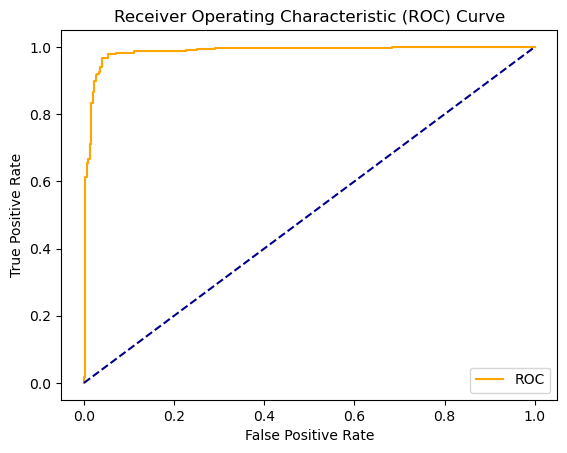

In [109]:
plot_roc_curve(fpr,tpr)